First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Label distribution:
 species
0    50
1    50
2    50
Name: count, dtype: int64


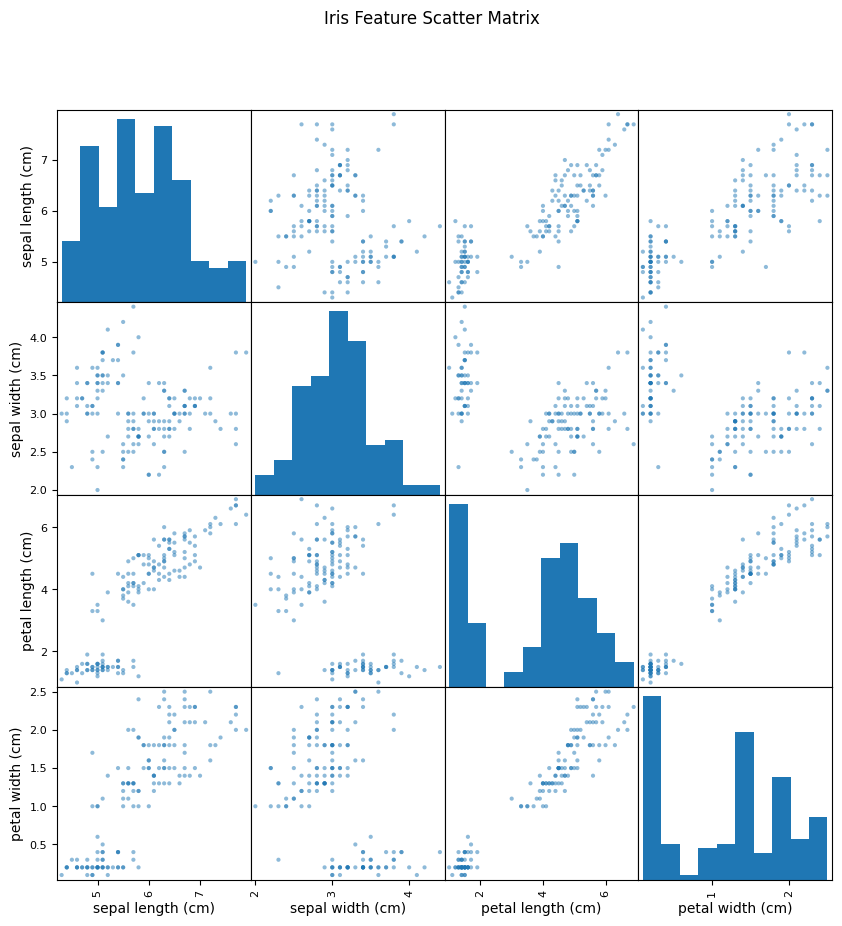


Train size: 112, Test size: 38

Logistic Regression Accuracy: 0.9210526315789473
Logistic Regression Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



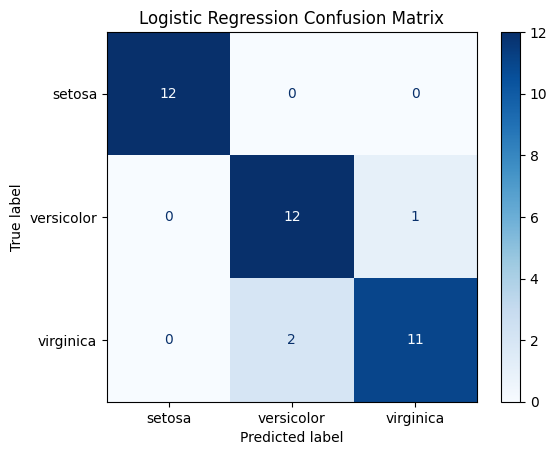


Random Forest Accuracy: 0.9210526315789473
Random Forest Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



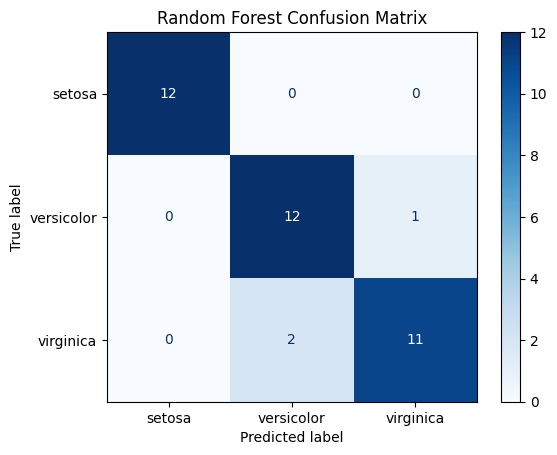


5-Fold CV Logistic Regression: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean: 0.9600000000000002

5-Fold CV Random Forest: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean: 0.9666666666666668

Best Params: {'rf__max_depth': 2, 'rf__n_estimators': 10}
Best CV Score: 0.9640316205533598

Tuned Random Forest Accuracy: 0.9210526315789473
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



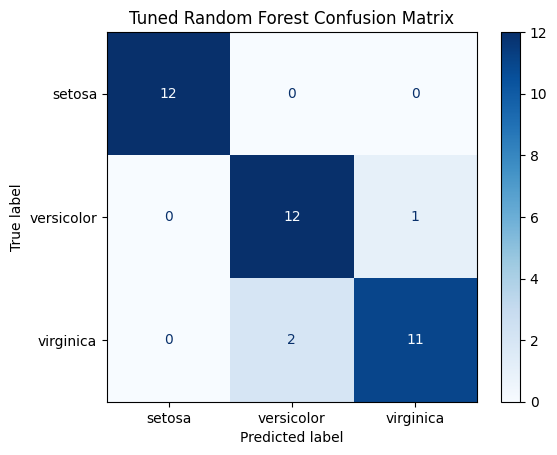


New Sample Predictions:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                6.0               2.2                4.0               1.0
2                6.9               3.1                5.4               2.1
Predicted Species: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
target_names = iris.target_names

print("First 5 rows:\n", X.head())
print("\nLabel distribution:\n", y.value_counts())


pd.plotting.scatter_matrix(X, figsize=(10, 10))
plt.suptitle("Iris Feature Scatter Matrix")
plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"\nTrain size: {len(X_train)}, Test size: {len(X_test)}")


pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=200))
])

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])


pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)


def evaluate(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    print(f"\n{title} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{title} Classification Report:\n",
          classification_report(y_test, y_pred, target_names=target_names))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{title} Confusion Matrix")
    plt.show()


evaluate(pipe_lr, X_test, y_test, "Logistic Regression")
evaluate(pipe_rf, X_test, y_test, "Random Forest")


print("\n5-Fold CV Logistic Regression:", cross_val_score(pipe_lr, X, y, cv=5))
print("Mean:", cross_val_score(pipe_lr, X, y, cv=5).mean())

print("\n5-Fold CV Random Forest:", cross_val_score(pipe_rf, X, y, cv=5))
print("Mean:", cross_val_score(pipe_rf, X, y, cv=5).mean())


param_grid = {
    'rf__n_estimators': [10, 50, 100],
    'rf__max_depth': [None, 2, 4, 6]
}

grid = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_rf = grid.best_estimator_
evaluate(best_rf, X_test, y_test, "Tuned Random Forest")


sample = pd.DataFrame([
    [5.1, 3.5, 1.4, 0.2],
    [6.0, 2.2, 4.0, 1.0],
    [6.9, 3.1, 5.4, 2.1]
], columns=X.columns)

preds = best_rf.predict(sample)
pred_species = [target_names[p] for p in preds]

print("\nNew Sample Predictions:")
print(sample)
print("Predicted Species:", pred_species)
